# 📝 Uplift modelling pipeline from scratch

Install depencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore')

# 1. Uplift modelling dataset

Loading a Lenta dataset from sckit-uplift package

- A `difference` between a `classic machine learning` dataset and an `uplift modelling dataset`


<img src="https://habrastorage.org/webt/m9/eq/t6/m9eqt6f0q9qnx3kmvvbspoeb42u.png" />


In [ ]:
# load dataset
from sklift.datasets import fetch_lenta

dataset = fetch_lenta()

Lenta dataset:   0%|          | 0.00/145M [00:00<?, ?iB/s]

<img src="https://habrastorage.org/webt/gy/bz/bf/gybzbfguornhndcrn5xzyq6ser8.png" />

# EDA

In [ ]:
print(f"Dataset type: {type(dataset)}")
print(f"Dataset features shape: {dataset.data.shape}")
print(f"Dataset target shape: {dataset.target.shape}")
print(f"Dataset treatment shape: {dataset.treatment.shape}")

Dataset type: <class 'sklearn.utils._bunch.Bunch'>
Dataset features shape: (687029, 193)
Dataset target shape: (687029,)
Dataset treatment shape: (687029,)


Dataset is a dictionary-like object with the following attributes:
* ``data`` (DataFrame object): Dataset without target and treatment.
* ``target`` (Series object): Column target by values.
* ``treatment`` (Series object): Column treatment by values.
* ``DESCR`` (str): Description of the Lenta dataset.
* ``feature_names`` (list): Names of the features.
* ``target_name`` (str): Name of the target.
* ``treatment_name`` (str): Name of the treatment.
                
**Major columns:**
- treatment `group` (str): test/control group flag
- target `response_att` (binary): target
- data `gender` (str): customer gender
- data `age` (float): customer age
- data `main_format` (int): store type (1 - grociery store, 0 - superstore)

Detailed feature description could be found [here](https://www.uplift-modeling.com/en/latest/api/datasets/fetch_lenta.html#lenta).

#### Target share for `treatment / control`

<Axes: xlabel='response_att', ylabel='count'>

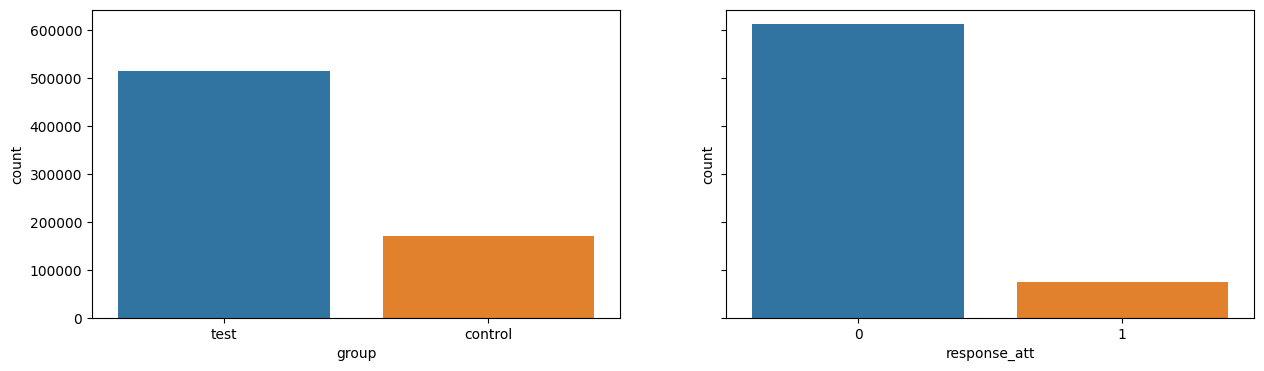

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,4))

treatment = dataset["treatment"]
target = dataset["target"]

sns.countplot(x=treatment, ax=ax[0])
sns.countplot(x=target, ax=ax[1])

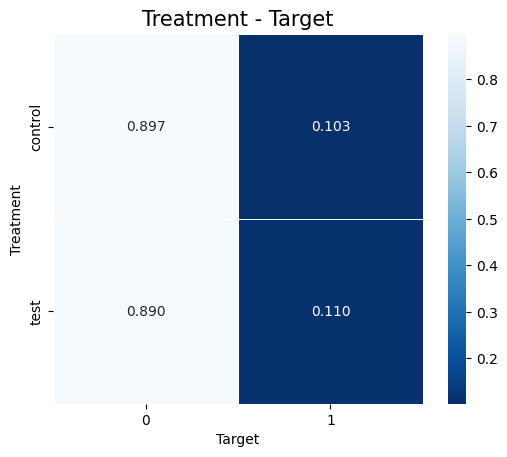

In [ ]:
def crosstab_plot(treatment, target):
    ct = pd.crosstab(treatment, target, normalize='index')

    sns.heatmap(ct, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Treatment')
    plt.xlabel('Target')
    plt.title("Treatment - Target", size = 15)

crosstab_plot(dataset.treatment, dataset.target)

In [ ]:
dataset.data.head().append(dataset.data.tail())

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,...,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m
0,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,6.0,1.0,...,3141.25,356.67,237.25,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008
1,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,...,113.39,62.69,58.71,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000
2,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,14.0,7.0,...,1239.19,533.46,83.37,593.13,1217.43,1336.83,3709.82,0.0000,NaN,0.0803
3,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,8.0,1.0,...,139.68,1849.91,360.40,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000
4,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,2.0,...,226.98,168.05,461.37,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495
687024,35.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,3.0,...,550.09,669.33,111.87,0.00,330.96,1173.84,119.99,2.6458,0.3646,0.3282
687025,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,28.01,0.0000,0.0000,0.0000
687026,36.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,449.01,0.00,0.0000,NaN,NaN
687027,37.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.00,46.72,0.00,0.00,0.00,0.00,0.00,0.0000,NaN,NaN
687028,40.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,...,290.01,0.00,0.00,0.00,228.47,752.32,596.86,0.0000,0.0000,0.0000


* There are 193 columns in the dataset
* The dataset contains:
    - basic information about clients (age, number of children)
    - information about some groups of goods
    - statistical information (variation of discounts, prices)



#### Missing values

In [ ]:
# check NaN values ratio
pd.DataFrame({"Total" : dataset.data.isna().sum().sort_values(ascending = False),
              "Percentage" : round(dataset.data.isna().sum().sort_values(ascending = False) / len(dataset.data), 3)}).head(20)

,Total,Percentage
k_var_sku_price_15d_g49,496259,0.722
k_var_disc_share_15d_g49,496159,0.722
k_var_count_per_cheque_15d_g34,468551,0.682
k_var_sku_price_15d_g34,468551,0.682
k_var_disc_share_15d_g34,468467,0.682
k_var_count_per_cheque_15d_g24,442121,0.644
k_var_disc_share_15d_g24,442054,0.643
k_var_sku_price_1m_g49,414473,0.603
k_var_count_per_cheque_1m_g49,414473,0.603
k_var_disc_share_1m_g49,414369,0.603


In [ ]:
print('Total missed data percentage:',
      round(100*dataset.data.isna().sum().sum()/(dataset.data.shape[0]*dataset.data.shape[1]), 2), '%')

Total missed data percentage: 19.34 %


#### Distributions of some features by *treatment*

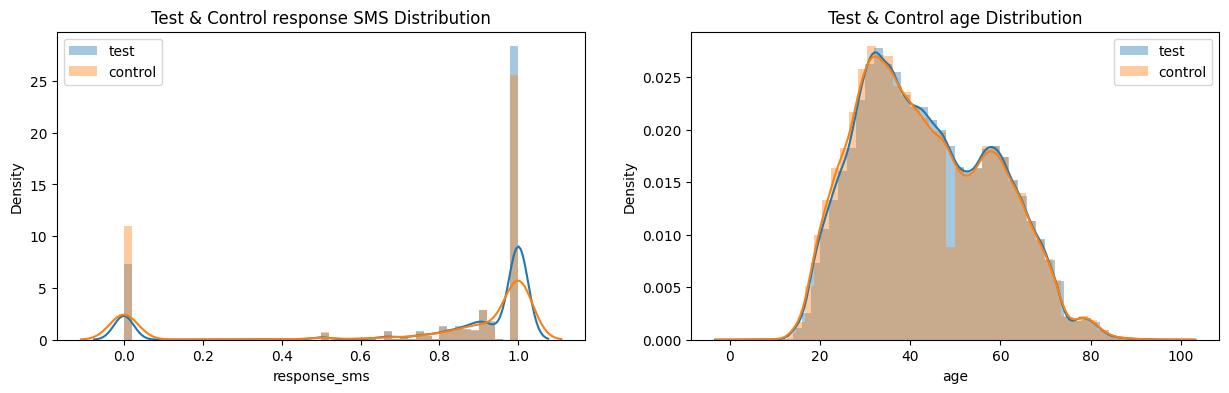

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

test_index = dataset.treatment[dataset.treatment == 'test'].index
control_index = dataset.treatment[dataset.treatment == 'control'].index

sns.distplot(dataset.data.loc[test_index, 'response_sms'], label='test', ax=ax[0])
sns.distplot(dataset.data.loc[control_index, 'response_sms'], label='control', ax=ax[0])
ax[0].title.set_text('Test & Control response SMS Distribution')
ax[0].legend()

sns.distplot(dataset.data.loc[test_index, 'age'], label='test', ax=ax[1])
sns.distplot(dataset.data.loc[control_index, 'age'], label='control', ax=ax[1])
ax[1].title.set_text('Test & Control age Distribution')
ax[1].legend()

##### Data transformation

In [ ]:
# make treatment binary
treat_dict = {
    'test': 1,
    'control': 0
}
dataset.treatment = dataset.treatment.map(treat_dict)

# make gender binary
gender_dict = {
    'M': 1,
    'Ж': 0
}
dataset.data.gender = dataset.data.gender.map(gender_dict)

# ❗️Adversarial validation

In [ ]:
from sklearn.model_selection import train_test_split

stratify_cols = pd.concat([dataset.treatment, dataset.target], axis=1)

X_train, X_val, treat_train, treat_val = train_test_split(
    pd.concat([dataset.data, dataset.target], axis=1),
    dataset.treatment,
    test_size=0.3,
    random_state=42,
    stratify=stratify_cols
)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Train shape: (480920, 194)
Validation shape: (206109, 194)


In [ ]:
from catboost import CatBoostClassifier

estimator = CatBoostClassifier(
    verbose=100,
    random_state=42,
    thread_count=1
  )

estimator = estimator.fit(X_train, treat_train)

Learning rate set to 0.143939
0:	learn: 0.6520728	total: 545ms	remaining: 9m 4s
100:	learn: 0.5431839	total: 47.8s	remaining: 7m 5s
200:	learn: 0.5393072	total: 1m 31s	remaining: 6m 4s
300:	learn: 0.5358702	total: 2m 14s	remaining: 5m 12s
400:	learn: 0.5325511	total: 2m 59s	remaining: 4m 28s
500:	learn: 0.5294079	total: 3m 44s	remaining: 3m 43s
600:	learn: 0.5263822	total: 4m 28s	remaining: 2m 58s
700:	learn: 0.5234086	total: 5m 13s	remaining: 2m 13s
800:	learn: 0.5205919	total: 5m 59s	remaining: 1m 29s
900:	learn: 0.5177487	total: 6m 44s	remaining: 44.4s
999:	learn: 0.5149313	total: 7m 29s	remaining: 0us


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(treat_val, estimator.predict(X_val))

0.5353878073471742

# 2. 👾 Uplift model

Lets write code for the `Two Model` approach or `T-learner`

In [ ]:
from sklearn.base import clone, BaseEstimator


class TwoModelApproach(BaseEstimator):

    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, treatment, y, fit_params={}):
        # assume treatment is binary
        X_treatment = X.loc[treatment == 1]
        y_treatment = pd.Series(y).loc[treatment == 1]
        X_control = X.loc[treatment == 0]
        y_control = pd.Series(y).loc[treatment == 0]

        model_control = clone(self.estimator)
        model_control.fit(X_control, y_control, **fit_params)

        X_treatment.loc[:, 'control_feature'] = model_control.predict_proba(X_treatment)[:, 1]

        model_treatment = clone(self.estimator)
        model_treatment.fit(X_treatment, y_treatment, **fit_params)

        self.model_control = model_control
        self.model_treatment = model_treatment

    def predict_proba(self, X_test):
        pred_control_test = self.model_control.predict_proba(X_test)[:, 1]
        X_test.loc[:, 'control_feature'] = pred_control_test
        pred_treatment_test = self.model_treatment.predict_proba(X_test)[:, 1]
        pred_uplift = pred_treatment_test - pred_control_test
        return pred_uplift


- train and validation for uplift model


In [ ]:
X_train, X_val, trmnt_train, trmnt_val, y_train, y_val = train_test_split(
    dataset.data,
    dataset.treatment,
    dataset.target,
    stratify=stratify_cols,
    test_size=0.3,
    random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Train shape: (480920, 193)
Validation shape: (206109, 193)


In [ ]:
from lightgbm import LGBMClassifier

lgbm_estimator = LGBMClassifier(random_state=42)

two_model = TwoModelApproach(estimator=lgbm_estimator)
two_model.fit(X_train, trmnt_train, y_train)

[LightGBM] [Info] Number of positive: 12289, number of negative: 107507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37521
[LightGBM] [Info] Number of data points in the train set: 119796, number of used features: 193
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.102583 -> initscore=-2.168851
[LightGBM] [Info] Start training from score -2.168851
[LightGBM] [Info] Number of positive: 39769, number of negative: 321355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.281074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38105
[LightGBM] [Info] Number of data points in the train set: 361124, number of used features: 194
[LightGBM]

- predict `uplift score`

In [ ]:
uplift = two_model.predict_proba(X_val)
uplift

array([ 0.04916225, -0.08456871,  0.00329836, ..., -0.0006798 ,
        0.00069552,  0.00836792])

# SHAP feature importance

- for two estimators inside `TwoModel`

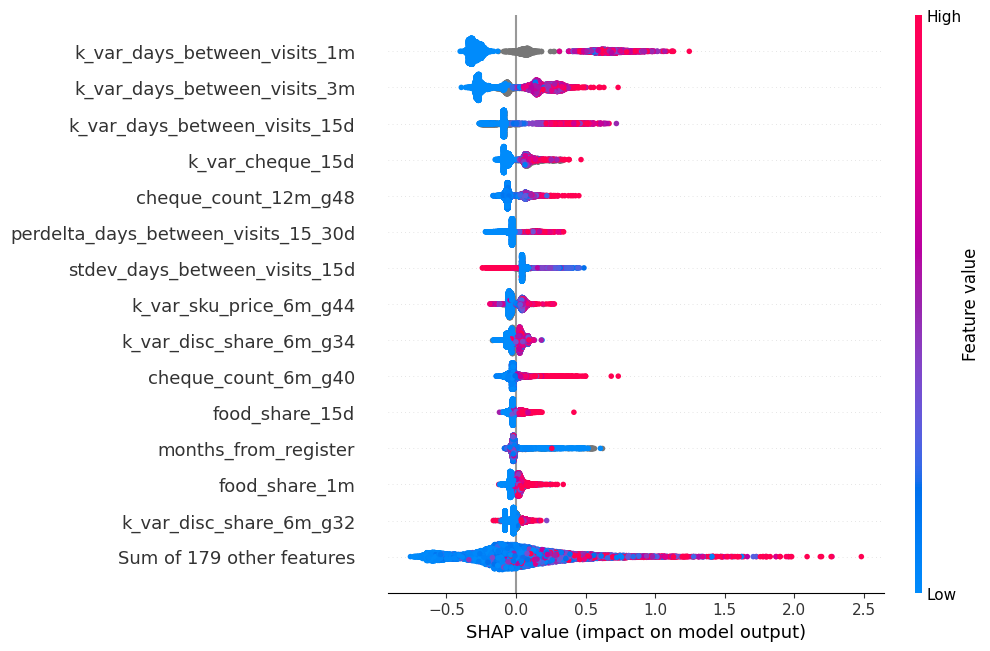

In [ ]:
import shap

subset = X_train.sample(n=10000)

# control model
explainer_control = shap.Explainer(two_model.model_control)
shap_values = explainer_control(subset)

shap.plots.beeswarm(shap_values[:, :, 1], max_display=15)

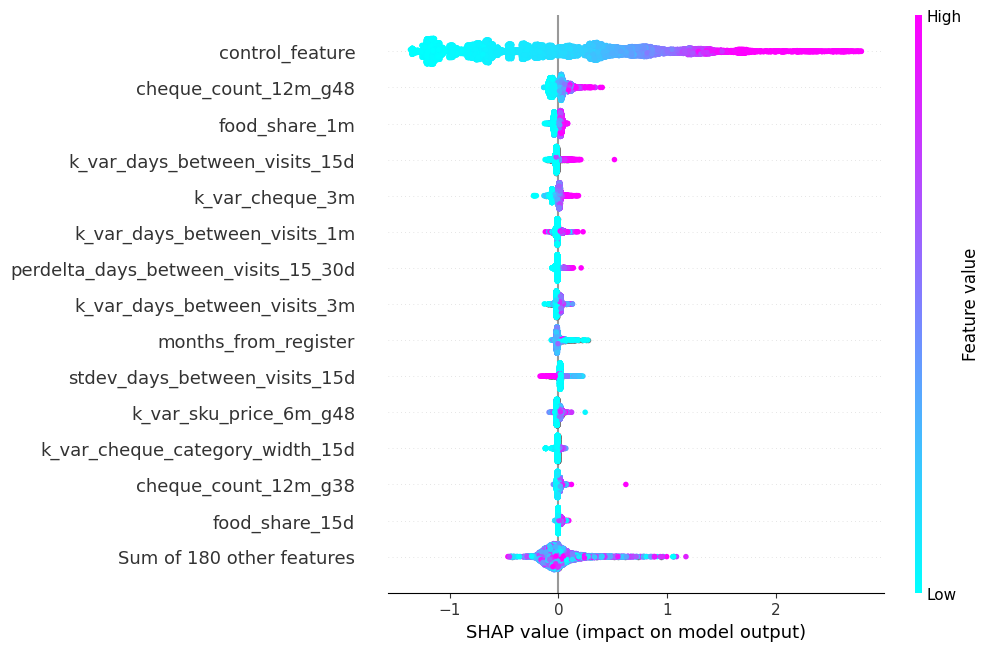

In [ ]:
# treatment model
subset = X_train.sample(n=10000)
explainer_treatment = shap.Explainer(two_model.model_treatment)
subset.loc[:, 'control_feature'] = two_model.model_control.predict_proba(subset)[:, 1]
shap_values = explainer_treatment(subset)

shap.plots.beeswarm(shap_values[:, :, 1], max_display=15, color=plt.get_cmap("cool"))

# 3. Uplift metrics

## `Uplift@k` metric = uplift at first k%

- usually falls between [0; 1] depending on k, model quality and data

### `uplift@k = target mean at k% in the treatment group - target mean at k% in the control group`

### How to count uplift@k:

1. sort by predicted uplift
2. select first k%
3. count target mean in the treatment group
4. count target mean in the control group
5. substract the mean in the control group from the mean in the treatment group


In [ ]:
def uplift_at_k(y_val, uplift, trmnt_val, k=0.05):

  # make sure input is np.array
  y_val, uplift, trmnt_val = np.array(y_val), np.array(uplift), np.array(trmnt_val)
  # convert k to threshold for an array
  threshold = int(len(y_val) * k) # 50
  order = np.argsort(uplift)[::-1] # indexes
  score_ctrl = y_val[order][:threshold][trmnt_val[order][:threshold] == 0].mean() # 0.567
  score_trmnt = y_val[order][:threshold][trmnt_val[order][:threshold] == 1].mean() # 0.685
  return score_trmnt - score_ctrl

In [ ]:
# 10%
k = 0.1
uplift_at_k(y_val, uplift, trmnt_val, k=0.1)

0.01561220458214646